In [193]:
import matplotlib.pyplot as plt
import numpy as np
from src.options import Colors, Linestyles
from src.aux_function import *
import json

fontSize = 15 
save_fig = True

# ===================== Plot of graphs for results of the first gan gs experiment =====================

In [23]:
json_file = open('outputs/gan_experiments_output.json')

gan_experiments = json.load(json_file)
print(gan_experiments.keys())

dict_keys(['description', 'val_recursive_1hour_models_15epochs', 'val_epoch_loss', 'disc_epoch_loss', 'gen_epoch_loss', 'best_val_loss_and_epoch'])


In [24]:
# values for best_unet recursive and cmv on mae up to 1 hour
best_unet = [0.05803579, 0.07733818, 0.09227042, 0.10242441, 0.11052191, 0.11825367]
cmv = [0.06407604, 0.08347717, 0.09616664, 0.10551146, 0.11290251, 0.119154]

## PLOT NO1: recursive validation up to 1 hour on RMSE on models trained 15 epochs

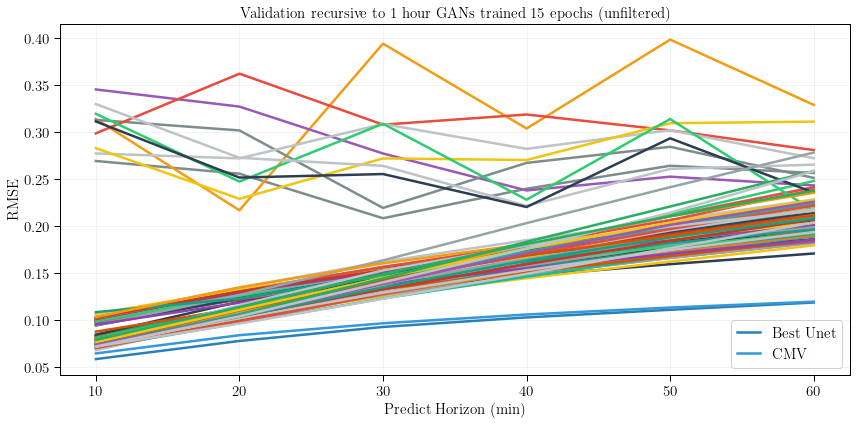

In [173]:
outputs = gan_experiments['val_recursive_1hour_models_15epochs']

# 1.1) Plot all values witout filtering
colors = [Colors.random_color(del_subpalettes=['blues']) for i in range(104)]

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation recursive to 1 hour GANs trained 15 epochs (unfiltered) ', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
i = 0
for k in outputs.keys():
    ax.plot(range(10, 70, 10), outputs[k], color=colors[i], linewidth=2.5)
    i +=1
    
ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./gan_plot11_validation_recursive_1hr_models_trained_15epochs_unfiltered.pdf')
    
plt.tight_layout()
plt.show()

Outliers filtered: ['aaah8', 'aaai3', 'aaai4', 'aaal4', 'aaal8', 'aaam4', 'aaam6', 'aaam7', 'aaam8', 'aaam11']


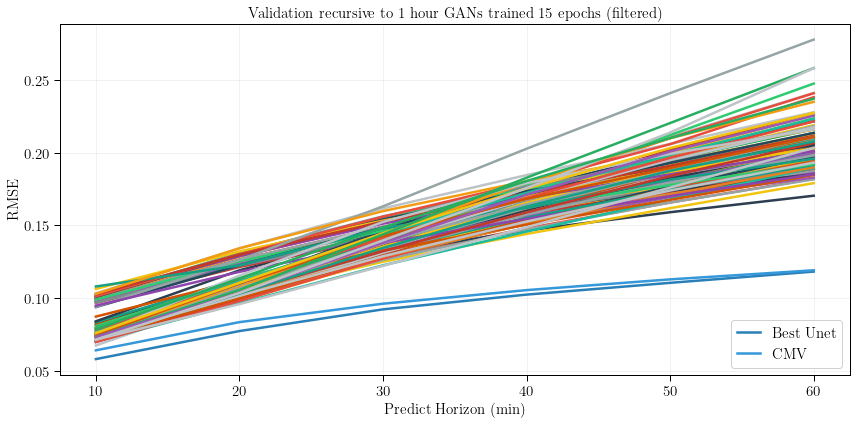

In [174]:
# 1.2) Plot all values filtering

outlier_exps = []
for k in outputs.keys():
    if outputs[k][0] > 0.25:
        outlier_exps.append(k)
print(f'Outliers filtered: {outlier_exps}')

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation recursive to 1 hour GANs trained 15 epochs (filtered) ', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
i = 0
for k in outputs.keys():
    if k not in outlier_exps:
        ax.plot(range(10, 70, 10), outputs[k], color=colors[i], linewidth=2.5)
    i += 1
ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./gan_plot12_validation_recursive_1hr_models_trained_15epochs_filtered.pdf')
    
plt.tight_layout()
plt.show()

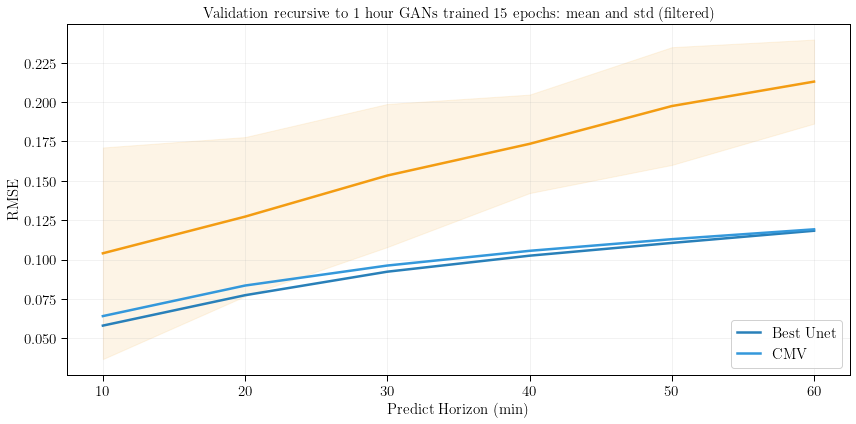

In [73]:
# 1.3) Plot mean and std for all models (filtered)

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation recursive to 1 hour GANs trained 15 epochs: mean and std (filtered)', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
stacked_outputs = []
for k in outputs.keys():
    if outputs[k] not in outlier_exps:
        stacked_outputs.append(outputs[k])

stacked_outputs = np.array(stacked_outputs)

mean = np.mean(stacked_outputs, axis=0)
std = np.std(stacked_outputs, axis=0)

ax.plot(range(10, 70, 10), mean, color=Colors.orange, linewidth=2.5)
plt.fill_between(range(10, 70, 10), mean - std, mean + std, color=Colors.orange, alpha=.1)

ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./gan_plot13_validation_recursive_1hr_models_trained_15epochs_mean_std_filtered.pdf')
    
plt.tight_layout()
plt.show()

## PLOT NO2: validation loss on all models for every epoch

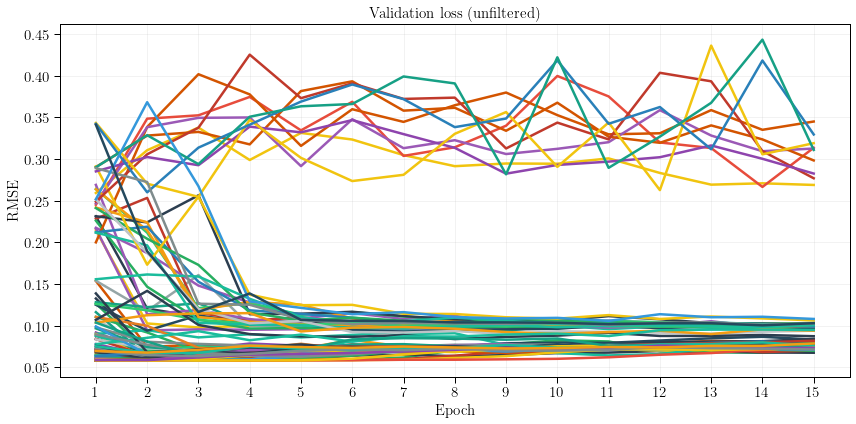

In [179]:
# 2.1) Val loss for every epoch unfiltered

outputs = gan_experiments['val_epoch_loss']

colors = [Colors.random_color() for i in range(104)]

show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation loss (unfiltered) ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
i = 0
for k in outputs.keys():
    ax.plot(x, outputs[k], color=colors[i], linewidth=2.5)
    i += 1
    
plt.xticks(x)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./gan_plot21_validation_loss_for_each_epoch_unfiltered.pdf')
    
plt.tight_layout()
plt.show()


Filtered experiments: ['aaah8', 'aaai3', 'aaai4', 'aaal4', 'aaal8', 'aaam4', 'aaam6', 'aaam7', 'aaam8', 'aaam11']


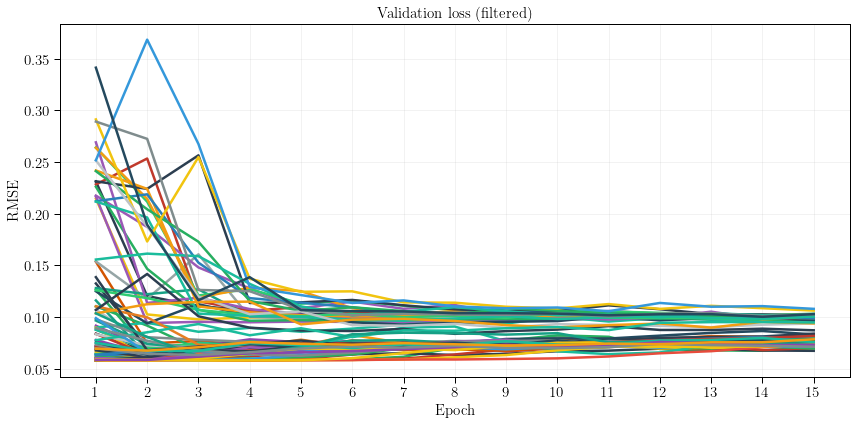

In [180]:
# 2.2) Val loss for every epoch filtered

outputs = gan_experiments['val_epoch_loss']

filtered_val_loss = []

for k in outputs.keys():
    if outputs[k][-1] > 0.2:
        filtered_val_loss.append(k)
print(f'Filtered experiments: {filtered_val_loss}')

show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation loss (filtered) ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
i = 0
for k in outputs.keys():
    if k not in filtered_val_loss:
        ax.plot(x, outputs[k], color=colors[i], linewidth=2.5)
    i += 1
    
# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

plt.xticks(x)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./gan_plot22_validation_loss_for_each_epoch_filtered.pdf')
    
plt.tight_layout()
plt.show()


Filtered experiments: ['aaah8', 'aaai3', 'aaai4', 'aaal4', 'aaal8', 'aaam4', 'aaam6', 'aaam7', 'aaam8', 'aaam11']


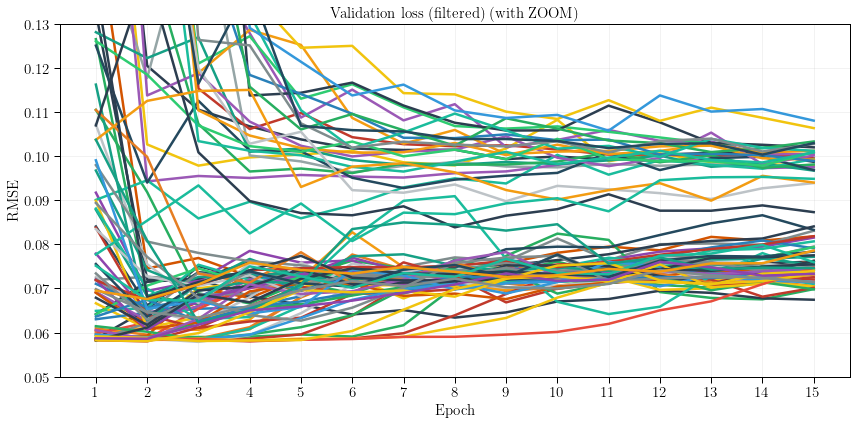

In [181]:
# 2.3) Val loss for every epoch filtered (with ZOOM)

outputs = gan_experiments['val_epoch_loss']

filtered_val_loss = []

for k in outputs.keys():
    if outputs[k][-1] > 0.2:
        filtered_val_loss.append(k)
print(f'Filtered experiments: {filtered_val_loss}')

show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation loss (filtered) (with ZOOM)', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)

ax.set_ylim(0.05, 0.13)

# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
i = 0
for k in outputs.keys():
    if k not in filtered_val_loss:
        ax.plot(x, outputs[k], color=colors[i], linewidth=2.5)
    i += 1
    
plt.xticks(x)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./gan_plot23_validation_loss_for_each_epoch_filtered_zoom.pdf')
    
plt.tight_layout()
plt.show()

['aaaj5', 'aaaj6', 'aaaj9', 'aaaj10', 'aaaj13', 'aaan5', 'aaan6', 'aaan9', 'aaan10', 'aaan13']


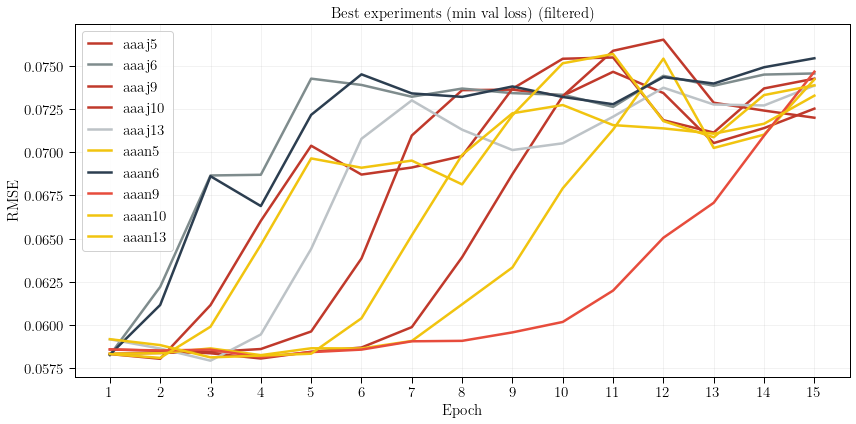

In [182]:
# 2.4) Val loss for every epoch filtered: only the 10 best experiments

outputs = gan_experiments['val_epoch_loss']

best_10_exp = get_best_n_exp(exp_dict=outputs, n=10)
print(best_10_exp)

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Best experiments (min val loss) (filtered) ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
i = 0
for k in outputs.keys():
    if k in best_10_exp:
        ax.plot(x, outputs[k], color=colors[i], 
                label=k, linewidth=2.5)
    i += 1

plt.xticks(x)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=0, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()


## PLOT NO3: Disc loss on all models for every epoch

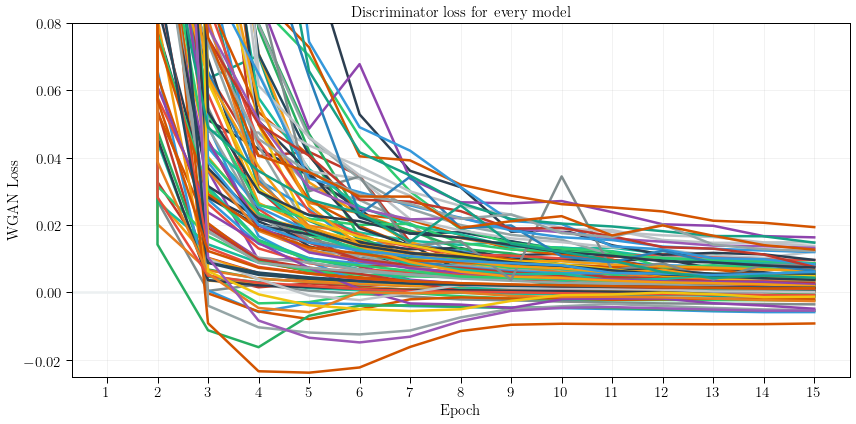

In [184]:
# 3.1) Disc loss for every epoch unfiltered

outputs = gan_experiments['disc_epoch_loss']

colors = [Colors.random_color() for i in range(104)]

show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Discriminator loss for every model', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'WGAN Loss', fontsize=fontSize)


# Tick size and grid
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
ax.axhline(y=0, color=Colors.clouds, linewidth=2.5, xmax=0.8)
i = 0
for k in outputs.keys():
    ax.plot(x, outputs[k], color=colors[i], linewidth=2.5)
    i += 1

plt.xticks(x)
plt.ylim(-0.025, 0.08)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()


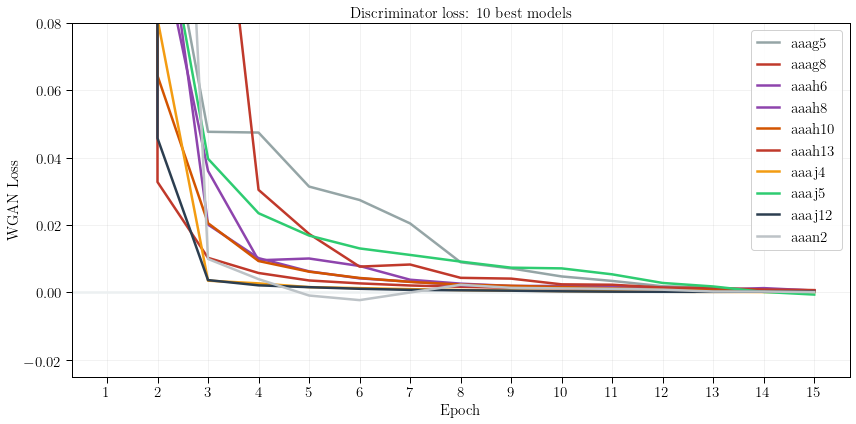

In [186]:
# 3.2) Disc loss for every epoch: 10 best models


outputs = gan_experiments['disc_epoch_loss']

# get best 10 models
n = 10
stacked = []
for k in outputs.keys():
    stacked.append(outputs[k])
stacked = np.array(stacked)

end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
                          (-1)*np.ones_like(stacked.shape[1])])
# ahora tengo en end_vals los valores finales, ahora quiero los indices de los 10 menores valores
best_models_idxs = end_vals.argsort()[:n]

best_models = []
for idx, k in enumerate(outputs.keys()):
    if idx in best_models_idxs:
        best_models.append(k)

# Plotting:
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Discriminator loss: 10 best models', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'WGAN Loss', fontsize=fontSize)


# Tick size and grid
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
ax.axhline(y=0, color=Colors.clouds, linewidth=2.5, xmax=0.8)

i = 0
for k in outputs.keys():
    if k in best_models:
        ax.plot(x, outputs[k], color=colors[i],
                linewidth=2.5, label=k)
    i += 1


plt.xticks(x)
plt.ylim(-0.025, 0.08)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()

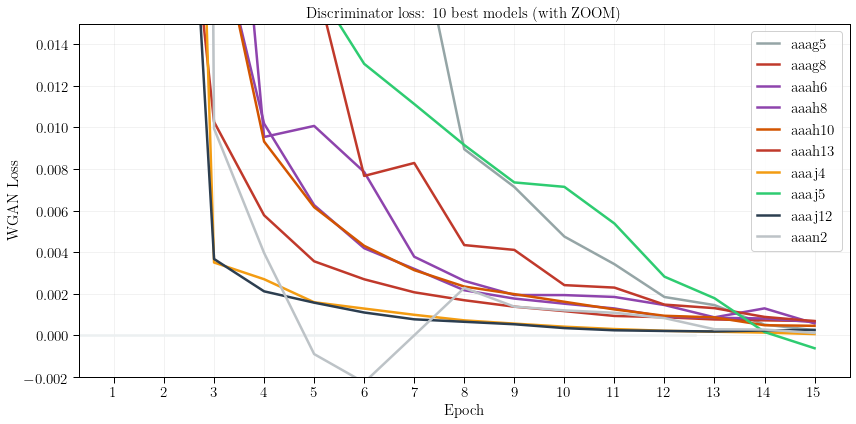

In [187]:
# 3.3) Disc loss for every epoch: 10 best models with ZOOM


outputs = gan_experiments['disc_epoch_loss']

# get best 10 models
n = 10
stacked = []
for k in outputs.keys():
    stacked.append(outputs[k])
stacked = np.array(stacked)

end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
                          (-1)*np.ones_like(stacked.shape[1])])
# ahora tengo en end_vals los valores finales, ahora quiero los indices de los 10 menores valores
best_models_idxs = end_vals.argsort()[:n]

best_models = []
for idx, k in enumerate(outputs.keys()):
    if idx in best_models_idxs:
        best_models.append(k)

# Plotting:
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Discriminator loss: 10 best models (with ZOOM)', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'WGAN Loss', fontsize=fontSize)


# Tick size and grid
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
ax.axhline(y=0, color=Colors.clouds, linewidth=2.5, xmax=0.8)
i = 0
for k in outputs.keys():
    if k in best_models:
        ax.plot(x, outputs[k], color=colors[i],
                linewidth=2.5, label=k)
    i += 1


plt.xticks(x)
plt.ylim(-0.002, 0.015)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()

## PLOT NO4: Gen loss on all models for every epoch

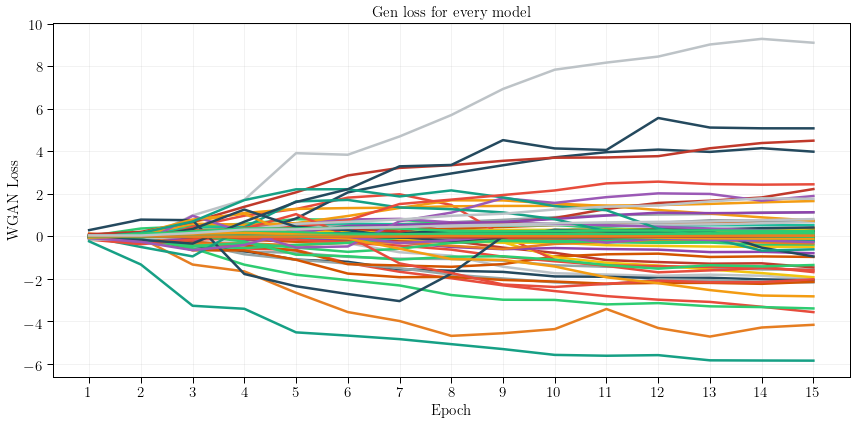

In [188]:
# 4.1) Gen loss for every epoch unfiltered

outputs = gan_experiments['gen_epoch_loss']

show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Gen loss for every model', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'WGAN Loss', fontsize=fontSize)


# Tick size and grid
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
for k in outputs.keys():
    ax.plot(x, outputs[k], color=Colors.random_color(del_subpalettes=['blues']), linewidth=2.5)


plt.xticks(x)
#plt.ylim(-0.025, 0.08)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()


## PLOT NO5: Validation recursive for all models and best epoch

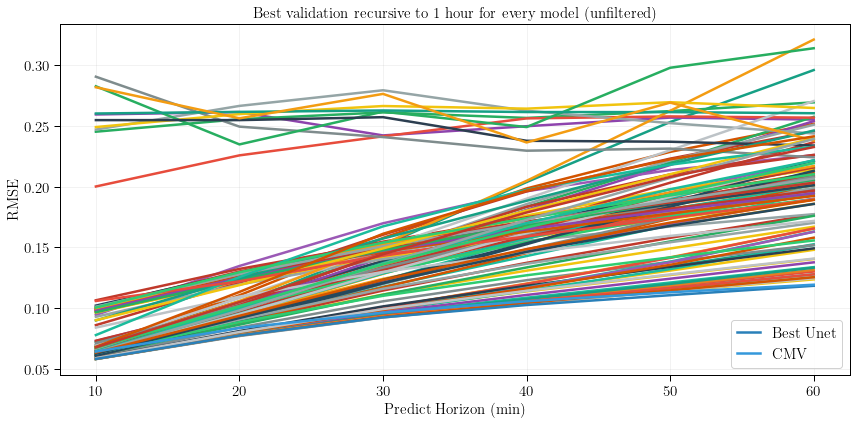

In [189]:
# 5.1) Plot all values witout filtering

outputs = gan_experiments['best_val_loss_and_epoch']

colors = [Colors.random_color(del_subpalettes=['blues']) for i in range(104)]

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Best validation recursive to 1 hour for every model (unfiltered) ', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
i = 0
for k in outputs.keys():
    ax.plot(range(10, 70, 10), outputs[k]['val_rec_1hr'], color=colors[i], linewidth=2.5)
    i += 1
    
ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()

Outliers filtered: ['aaah8', 'aaai3', 'aaai4', 'aaal4', 'aaal8', 'aaam4', 'aaam6', 'aaam7', 'aaam8', 'aaam11']


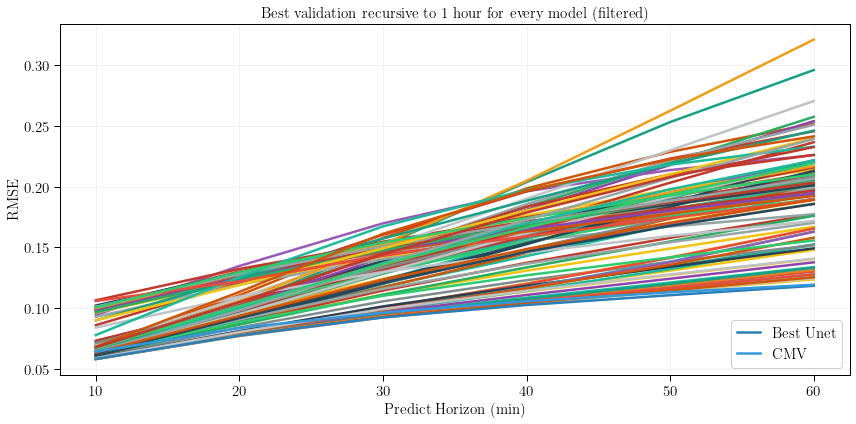

In [190]:
# 5.2) Plot all values with filtering

outputs = gan_experiments['best_val_loss_and_epoch']

outlier_exps = []
for k in outputs.keys():
    if outputs[k]['val_rec_1hr'][0] > 0.15:
        outlier_exps.append(k)
print(f'Outliers filtered: {outlier_exps}')

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Best validation recursive to 1 hour for every model (filtered) ', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
i = 0
for k in outputs.keys():
    if k not in outlier_exps:
        ax.plot(range(10, 70, 10), outputs[k]['val_rec_1hr'], color=colors[i], linewidth=2.5)
    i += 1
    
ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()

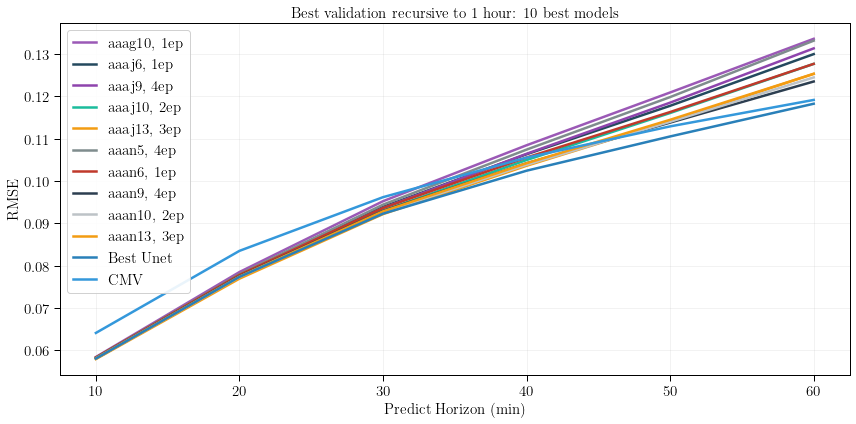

In [191]:
# 5.3) Plot 10 best models

outputs = gan_experiments['best_val_loss_and_epoch']


# get best 10 models
n = 10
stacked = []
for k in outputs.keys():
    stacked.append(outputs[k]['val_rec_1hr'])
stacked = np.array(stacked)

end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
                          (-1)*np.ones_like(stacked.shape[1])])

# ahora tengo en end_vals los valores finales, ahora quiero los indices de los 10 menores valores
best_models_idxs = end_vals.argsort()[:n]

best_models = []
for idx, k in enumerate(outputs.keys()):
    if idx in best_models_idxs:
        best_models.append(k)

colors = [Colors.random_color(del_subpalettes=['blues']) for i in range(104)]

# Plotting
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Best validation recursive to 1 hour: 10 best models', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
i = 0
for k in outputs.keys():
    if k in best_models:
        epoch = outputs[k]['epoch']
        ax.plot(range(10, 70, 10), outputs[k]['val_rec_1hr'], 
                color=colors[i],
                linewidth=2.5, label=f'{k}, {epoch}ep')
    i += 1
        
ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=0, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()

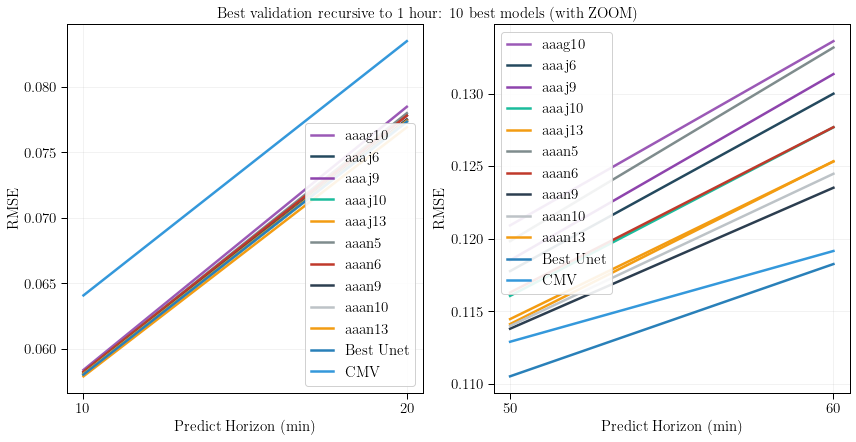

In [192]:
# 5.4) Plot 10 best models: Zooms

outputs = gan_experiments['best_val_loss_and_epoch']

# get best 10 models
n = 10
stacked = []
for k in outputs.keys():
    stacked.append(outputs[k]['val_rec_1hr'])
stacked = np.array(stacked)

end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
                          (-1)*np.ones_like(stacked.shape[1])])

# ahora tengo en end_vals los valores finales, ahora quiero los indices de los 10 menores valores
best_models_idxs = end_vals.argsort()[:n]

best_models = []
for idx, k in enumerate(outputs.keys()):
    if idx in best_models_idxs:
        best_models.append(k)

# Plotting
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.suptitle(r'Best validation recursive to 1 hour: 10 best models (with ZOOM)', 
             fontsize=fontSize, y=1.015)
fig.set_size_inches(12, 6)

# FIRST SUBPLOT =============================================================
ax = fig.add_subplot(1, 2, 1)

# Labels and Title
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')


# Plotting 
plot_to = 2
x = range(10, (plot_to+1)*10, 10)
plt.xticks(x)

i = 0
for k in outputs.keys():
    if k in best_models:
        epoch = outputs[k]['epoch']
        ax.plot(x, outputs[k]['val_rec_1hr'][:plot_to], 
                color=colors[i],
                linewidth=2.5, label=f'{k}')
    i += 1
        
ax.plot(x, best_unet[:plot_to], color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(x, cmv[:plot_to], color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# SECOND SUBPLOT =============================================================
ax = fig.add_subplot(1, 2, 2)

# Labels and Title
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
plot_from = 5
x = range(plot_from*10, 70, 10)
plt.xticks(x)

i = 0
for k in outputs.keys():
    if k in best_models:
        epoch = outputs[k]['epoch']
        ax.plot(x, outputs[k]['val_rec_1hr'][(plot_from-1):], 
                color=colors[i],
                linewidth=2.5, label=f'{k}')
    i += 1
        
ax.plot(x, best_unet[(plot_from-1):], color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(x, cmv[(plot_from-1):], color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=2, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()